## ALGORITMOS DE ORDENAMIENTO Y BÚSQUEDA - SIMULACIÓN TIENDA ONLINE

### 1. Introducción
En el mundo de la programación, hay dos tareas que hacemos muy a menudo: ordenar listas de cosas y buscar elementos dentro de esas listas. Estas tareas son tan comunes que existen diferentes "recetas" o algoritmos para hacerlas.

Imagina una tienda online como Mercado Libre o Amazon. Necesitan:

- Ordenar sus productos por precio para que puedas verlos del más barato al más caro (o viceversa).

- Permitir que busques un producto específico por su nombre o código.

En este notebook, vamos a simular estas situaciones. Crearemos una lista de productos y luego aplicaremos diferentes algoritmos de ordenamiento y búsqueda para ver cómo se comportan y cuál es más rápido en cada caso.

### 2.PREPARACIÓN DE DATOS: NUESTRA LISTA DE PRODUCTOS

Para simular los productos de una tienda online, usaremos listas de diccionarios.

Cada diccionario representará un producto y tendrá su id (un número único), nombre (lo que se vende) y precio.

#### 2.1. Importaciones Necesarias

Necesitamos algunas herramientas de Python para este trabajo:

* **random**: Para generar precios aleatorios para nuestros productos.

* **time**: Para medir cuánto tiempo tarda cada algoritmo en funcionar.

* **matplotlib.pyplot**: Para crear los gráficos que nos ayudarán a visualizar el rendimiento.

* **copy**: Para asegurarnos de que cada algoritmo de ordenamiento siempre trabaje con una copia "fresca" de la lista original, sin modificarla para la siguiente prueba.

In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy # Usaremos copy.deepcopy para no modificar la lista original en cada prueba

#### 2.2. Generación de Productos como Diccionarios

Ahora, crearemos una función sencilla que nos generará una lista de productos.

In [2]:
# --- Función para generar una lista de productos (diccionario) ---
def generar_productos(cantidad):
    productos_nombre = ["Televisor", "Celular", "Laptop", "Auricular", "Tablet", "Monitor", "Reloj", "Consola", "Cámara", "Altavoz"]
    lista_de_productos = [] # Creamos una lista vacía para guardar nuestros productos
    for i in range(cantidad):
        producto = { # Creamos un diccionario para cada producto
            "id": i + 1, # Un ID único para cada producto
            "nombre": random.choice(productos_nombre), # Un nombre generado aleatoriamente
            "precio": round(random.uniform(50.00, 2000.00), 2) # Un precio aleatorio con dos decimales
        }
        lista_de_productos.append(producto) # Agregamos el diccionario de producto a la lista
    return lista_de_productos

# --- Ejemplo de cómo se vería nuestra lista de productos ---
# Generamos 5 productos para ver su estructura
productos_ejemplo = generar_productos(5)
print("--- Primeros 5 productos de ejemplo generados: ---")
for p in productos_ejemplo:
    print(p)
print("-" * 50)

--- Primeros 5 productos de ejemplo generados: ---
{'id': 1, 'nombre': 'Monitor', 'precio': 1700.9}
{'id': 2, 'nombre': 'Monitor', 'precio': 1223.93}
{'id': 3, 'nombre': 'Televisor', 'precio': 1458.34}
{'id': 4, 'nombre': 'Televisor', 'precio': 704.43}
{'id': 5, 'nombre': 'Celular', 'precio': 1125.68}
--------------------------------------------------


### 3.ALGORTIMOS DE ORDENAMIENTO

Los algoritmos de ordenamiento se encargan de organizar una lista de elementos en un orden específico (por ejemplo, de menor a mayor precio). 

Veremos cuatro de ellos.

#### 3.1. BUBBLE SORT (ORDENAMIENTO DE BURBUJA)

Compara elementos adyacentes (uno al lado del otro) y los intercambia si están en el orden incorrecto. Repite este proceso una y otra vez, haciendo que los elementos "más pesados" (en este caso, los más caros) "floten" lentamente al final de la lista, como burbujas.

In [3]:
# --- Bubble Sort (Burbuja) ---
# Ordena una lista de productos (diccionarios) por su 'precio' de menor a mayor.
def bubble_sort(lista_productos):
    n = len(lista_productos) # Obtenemos la cantidad de productos en la lista

    # Este bucle controla las "pasadas" por la lista.
    # En cada pasada, el elemento más grande no ordenado se mueve a su posición final.
    for i in range(n - 1):
        # Este bucle recorre los elementos adyacentes para compararlos e intercambiarlos.
        # Restamos 'i' porque los últimos 'i' elementos ya están ordenados y no necesitan ser revisados.
        for j in range(0, n - i - 1):
            # Comparamos el 'precio' del producto actual con el 'precio' del siguiente producto.
            if lista_productos[j]['precio'] > lista_productos[j + 1]['precio']:
                # Si el precio del producto actual es MAYOR que el del siguiente, ¡están en el orden incorrecto!
                # Los intercambiamos de posición.
                temp = lista_productos[j] # Guardamos el producto actual temporalmente
                lista_productos[j] = lista_productos[j + 1] # Movemos el producto siguiente a la posición actual
                lista_productos[j + 1] = temp # Ponemos el producto original (que era más caro) en la siguiente posición
    return lista_productos # Retornamos la lista ya ordenada

# --- Ejemplo de uso de Bubble Sort ---
print("--- Ejemplo de Bubble Sort ---")

# 1) Genero una lista pequeña para el ejemplo
productos_ejemplo = generar_productos(10)

# 2) Muestro los 10 primeros sin ordenar
print("Primero 10 productos (sin ordenar):")
for p in productos_ejemplo:
    print(p)

# 3) Ordeno
ordenados = bubble_sort(productos_ejemplo.copy())

# 4) Muestro los 10 primeros ya ordenados
print("\nPrimeros 10 productos (ordenados por precio):")
for p in ordenados:
    print(p)

print("-" * 50)

--- Ejemplo de Bubble Sort ---
Primero 10 productos (sin ordenar):
{'id': 1, 'nombre': 'Televisor', 'precio': 1939.06}
{'id': 2, 'nombre': 'Consola', 'precio': 381.87}
{'id': 3, 'nombre': 'Tablet', 'precio': 1389.15}
{'id': 4, 'nombre': 'Consola', 'precio': 1973.23}
{'id': 5, 'nombre': 'Laptop', 'precio': 401.79}
{'id': 6, 'nombre': 'Tablet', 'precio': 53.16}
{'id': 7, 'nombre': 'Televisor', 'precio': 1301.51}
{'id': 8, 'nombre': 'Reloj', 'precio': 336.15}
{'id': 9, 'nombre': 'Laptop', 'precio': 233.79}
{'id': 10, 'nombre': 'Auricular', 'precio': 1099.7}

Primeros 10 productos (ordenados por precio):
{'id': 6, 'nombre': 'Tablet', 'precio': 53.16}
{'id': 9, 'nombre': 'Laptop', 'precio': 233.79}
{'id': 8, 'nombre': 'Reloj', 'precio': 336.15}
{'id': 2, 'nombre': 'Consola', 'precio': 381.87}
{'id': 5, 'nombre': 'Laptop', 'precio': 401.79}
{'id': 10, 'nombre': 'Auricular', 'precio': 1099.7}
{'id': 7, 'nombre': 'Televisor', 'precio': 1301.51}
{'id': 3, 'nombre': 'Tablet', 'precio': 1389.15}


#### 3.2. SELECTION SORT (ORDENAMIENTO DE SELECIÓN)

En cada "pasada", busca el elemento más pequeño de la parte no ordenada de la lista y lo coloca en la posición correcta al principio de esa parte no ordenada.

In [4]:
# --- Selection Sort (Selección) ---
# Ordena una lista de productos (diccionarios) por su 'precio' de menor a mayor.
def selection_sort(lista_productos):
    n = len(lista_productos) # Obtenemos la cantidad de productos en la lista

    # Este bucle recorre toda la lista. En cada iteración 'i', encontramos el elemento más pequeño
    # de la parte restante de la lista y lo colocamos en la posición 'i'.
    for i in range(n):
        # Asumimos que el elemento en la posición actual 'i' es el más pequeño
        min_idx = i

        # Este bucle busca el elemento más pequeño en el resto de la lista (desde i+1 hasta el final)
        for j in range(i + 1, n):
            # Comparamos el 'precio' del producto actual (j) con el 'precio' del mínimo encontrado hasta ahora (min_idx)
            if lista_productos[j]['precio'] < lista_productos[min_idx]['precio']:
                min_idx = j # Si encontramos un producto con un precio menor, actualizamos el índice del mínimo

        # Una vez que encontramos el mínimo en la parte no ordenada, lo intercambiamos
        # con el elemento en la posición 'i'. Esto coloca el elemento más pequeño en su posición correcta.
        temp = lista_productos[i]
        lista_productos[i] = lista_productos[min_idx]
        lista_productos[min_idx] = temp
    return lista_productos # Retornamos la lista ya ordenada

# --- Ejemplo de uso de Selection Sort ---
print("--- Ejemplo de Selection Sort ---")

# 1) Genero una lista pequeña para el ejemplo
productos_ejemplo = generar_productos(10)

# 2) Muestro los 10 primeros sin ordenar
print("Primero 10 productos (sin ordenar):")
for p in productos_ejemplo:
    print(p)

# 3) Ordeno
ordenados = selection_sort(productos_ejemplo.copy())

# 4) Muestro los 10 primeros ya ordenados
print("\nPrimeros 10 productos (ordenados por precio):")
for p in ordenados:
    print(p)

print("-" * 50)

--- Ejemplo de Selection Sort ---
Primero 10 productos (sin ordenar):
{'id': 1, 'nombre': 'Televisor', 'precio': 1718.1}
{'id': 2, 'nombre': 'Cámara', 'precio': 1442.56}
{'id': 3, 'nombre': 'Auricular', 'precio': 218.38}
{'id': 4, 'nombre': 'Monitor', 'precio': 802.56}
{'id': 5, 'nombre': 'Celular', 'precio': 1033.83}
{'id': 6, 'nombre': 'Tablet', 'precio': 1427.52}
{'id': 7, 'nombre': 'Altavoz', 'precio': 454.4}
{'id': 8, 'nombre': 'Celular', 'precio': 963.87}
{'id': 9, 'nombre': 'Auricular', 'precio': 1442.79}
{'id': 10, 'nombre': 'Reloj', 'precio': 1189.08}

Primeros 10 productos (ordenados por precio):
{'id': 3, 'nombre': 'Auricular', 'precio': 218.38}
{'id': 7, 'nombre': 'Altavoz', 'precio': 454.4}
{'id': 4, 'nombre': 'Monitor', 'precio': 802.56}
{'id': 8, 'nombre': 'Celular', 'precio': 963.87}
{'id': 5, 'nombre': 'Celular', 'precio': 1033.83}
{'id': 10, 'nombre': 'Reloj', 'precio': 1189.08}
{'id': 6, 'nombre': 'Tablet', 'precio': 1427.52}
{'id': 2, 'nombre': 'Cámara', 'precio': 1

#### 3.3. INSERTION SORT (ORDENAMIENTO DE INSERCIÓN)

Recorre la lista tomando un elemento a la vez y lo "inserta" en su posición correcta dentro de la parte de la lista que ya está ordenada. Piensa en cómo ordenarías un mazo de cartas: tomas una carta y la pones en su lugar entre las que ya tienes ordenadas.

In [5]:
# --- Insertion Sort (Inserción) ---
# Ordena una lista de productos (diccionarios) por su 'precio' de menor a mayor.
def insertion_sort(lista_productos):
    # Empezamos desde el segundo elemento (índice 1), porque el primer elemento (índice 0)
    # se considera una parte "ya ordenada" de un solo elemento.
    for i in range(1, len(lista_productos)):
        # Guardamos el elemento actual que queremos insertar en su lugar correcto.
        key_producto = lista_productos[i]
        j = i - 1 # 'j' es el índice del último elemento de la parte ya ordenada.

        # Este bucle mueve los elementos de la parte ordenada (que son mayores que 'key_producto.precio')
        # una posición a la derecha, para hacer espacio para 'key_producto'.
        while j >= 0 and key_producto['precio'] < lista_productos[j]['precio']:
            lista_productos[j + 1] = lista_productos[j] # Mueve el elemento a la derecha
            j -= 1 # Retrocede para comparar con el siguiente elemento a la izquierda

        # Cuando el bucle termina, 'j+1' es la posición correcta para insertar 'key_producto'.
        lista_productos[j + 1] = key_producto
    return lista_productos # Retornamos la lista ya ordenada

# --- Ejemplo de uso de Insertion Sort ---
print("--- Ejemplo de Insertion Sort ---")

# 1) Genero una lista pequeña para el ejemplo
productos_ejemplo = generar_productos(10)

# 2) Muestro los 10 primeros sin ordenar
print("Primero 10 productos (sin ordenar):")
for p in productos_ejemplo:
    print(p)

# 3) Ordeno
ordenados = insertion_sort(productos_ejemplo.copy())

# 4) Muestro los 10 primeros ya ordenados
print("\nPrimeros 10 productos (ordenados por precio):")
for p in ordenados:
    print(p)

print("-" * 50)

--- Ejemplo de Insertion Sort ---
Primero 10 productos (sin ordenar):
{'id': 1, 'nombre': 'Auricular', 'precio': 881.62}
{'id': 2, 'nombre': 'Laptop', 'precio': 548.39}
{'id': 3, 'nombre': 'Monitor', 'precio': 284.8}
{'id': 4, 'nombre': 'Consola', 'precio': 1337.84}
{'id': 5, 'nombre': 'Monitor', 'precio': 1363.94}
{'id': 6, 'nombre': 'Televisor', 'precio': 112.09}
{'id': 7, 'nombre': 'Reloj', 'precio': 1471.35}
{'id': 8, 'nombre': 'Tablet', 'precio': 1249.71}
{'id': 9, 'nombre': 'Tablet', 'precio': 313.6}
{'id': 10, 'nombre': 'Altavoz', 'precio': 267.56}

Primeros 10 productos (ordenados por precio):
{'id': 6, 'nombre': 'Televisor', 'precio': 112.09}
{'id': 10, 'nombre': 'Altavoz', 'precio': 267.56}
{'id': 3, 'nombre': 'Monitor', 'precio': 284.8}
{'id': 9, 'nombre': 'Tablet', 'precio': 313.6}
{'id': 2, 'nombre': 'Laptop', 'precio': 548.39}
{'id': 1, 'nombre': 'Auricular', 'precio': 881.62}
{'id': 8, 'nombre': 'Tablet', 'precio': 1249.71}
{'id': 4, 'nombre': 'Consola', 'precio': 1337.8

#### 3.4. QUICKSORT (ORDENAMIENTO RÁPIDO)

Es un algoritmo "divide y vencerás". Elige un elemento llamado "pivote" (en nuestro caso, el precio de un producto). Luego, reorganiza la lista para que todos los productos con precio menor que el pivote estén a su izquierda, y todos los productos con precio mayor estén a su derecha. Después, hace lo mismo con las dos "sub-listas" resultantes (izquierda y derecha), una y otra vez, hasta que toda la lista está ordenada. Es un poco más complejo porque usa una función que se llama a sí misma (recursividad).

In [ ]:
def particion(arr, lo, hi):
    """
    Partición.
    Deja todos los elementos cuyo precio sea ≤ pivote a la izquierda
    y los > pivote a la derecha.  Devuelve el índice final del pivote.
    """
    # 1) Elegimos como pivote el último elemento de la sublista.
    pivote = arr[hi]['precio']          # <-- precio que usaremos de referencia

    # 2) 'i' marcará la frontera de los elementos menores/iguales al pivote.
    i = lo - 1                       # comienza antes del primer índice válido

    # 3) Recorremos la sublista desde 'lo' hasta 'hi-1'.
    for j in range(lo, hi):
        # 3a) ¿El precio actual es ≤ precio pivote?
        if arr[j]['precio'] <= pivote:
            i += 1                   # avanzamos la frontera
            # 3b) Intercambiamos para que el elemento “pequeño” quede antes.
            tmp = arr[i]
            arr[i] = arr[j]
            arr[j] = tmp

    # 4) Colocamos el pivote justo después de la zona de “menores”.
    tmp = arr[i + 1]
    arr[i + 1] = arr[hi]
    arr[hi] = tmp

    # 5) Devolvemos la posición definitiva del pivote.
    return i + 1


def quick_sort(arr, lo: int = 0, hi: int | None = None):
    """
    QuickSort(recursivo).

    Parámetros
    ----------
    arr : list[dict]
        Lista de productos con la clave 'precio'.
    lo : int
        Índice inicial de la sublista a ordenar.
    hi : int | None
        Índice final de la sublista a ordenar.  Si es None se toma
        el último índice de la lista (primera llamada).
    """
    # 0) Ajuste de 'hi' en la llamada principal.
    #    Cuando el usuario llama quick_sort(lista) no pasa hi:
    #    lo=0  (por defecto)   hi=None
    #    Por lo tanto queremos que hi apunte al ÚLTIMO índice existente.
    if hi is None:
        hi = len(arr) - 1

    # 1) CASO BASE de la recursión:
    #    Si la sublista [lo..hi] tiene 0 ó 1 elementos, ya está ordenada.
    #    Eso ocurre cuando lo >= hi.
    if lo < hi:
        # 2) Dividimos la lista en torno al pivote;
        #    'p' es la posición final del pivote.
        p = particion(arr, lo, hi)

        # 3) Ordenamos recursivamente la mitad izquierda (menores).
        quick_sort(arr, lo, p - 1)

        # 4) Ordenamos recursivamente la mitad derecha (mayores).
        quick_sort(arr, p + 1, hi)

    # 5) Al final de la recursión, la lista ya está ordenada.
    return arr

# --- Ejemplo de uso de QuickSort ---
print("--- Ejemplo de QuickSort ---")

# 1) Genero una lista de 10 productos ficticios
productos_ejemplo = generar_productos(10)

# 2) Muestro la lista SIN ordenar
print("Primero 10 productos (sin ordenar):")
for p in productos_ejemplo:
    print(p)

# 3) Ordeno por precio
ordenados = quick_sort(productos_ejemplo.copy())

# 4) Muestro la lista ORDENADA
print("\nPrimeros 10 productos (ordenados por precio):")
for p in ordenados:
    print(p)

print("-" * 50)

--- Ejemplo de QuickSort ---
Primero 10 productos (sin ordenar):
{'id': 1, 'nombre': 'Laptop', 'precio': 973.76}
{'id': 2, 'nombre': 'Monitor', 'precio': 1106.2}
{'id': 3, 'nombre': 'Televisor', 'precio': 1923.31}
{'id': 4, 'nombre': 'Tablet', 'precio': 1741.17}
{'id': 5, 'nombre': 'Cámara', 'precio': 1335.52}
{'id': 6, 'nombre': 'Laptop', 'precio': 1871.31}
{'id': 7, 'nombre': 'Televisor', 'precio': 1267.72}
{'id': 8, 'nombre': 'Auricular', 'precio': 586.85}
{'id': 9, 'nombre': 'Tablet', 'precio': 1864.64}
{'id': 10, 'nombre': 'Altavoz', 'precio': 1324.98}

Primeros 10 productos (ordenados por precio):
{'id': 8, 'nombre': 'Auricular', 'precio': 586.85}
{'id': 1, 'nombre': 'Laptop', 'precio': 973.76}
{'id': 2, 'nombre': 'Monitor', 'precio': 1106.2}
{'id': 7, 'nombre': 'Televisor', 'precio': 1267.72}
{'id': 10, 'nombre': 'Altavoz', 'precio': 1324.98}
{'id': 5, 'nombre': 'Cámara', 'precio': 1335.52}
{'id': 4, 'nombre': 'Tablet', 'precio': 1741.17}
{'id': 9, 'nombre': 'Tablet', 'precio': 

### 4.MEDICIÓN Y COMPARACIÓN DE ALGORITMOS DE ORDENAMIENTO

Ahora que tenemos nuestros algoritmos, vamos a ver cuál es el más eficiente. Mediremos el tiempo que tarda cada uno en ordenar listas de diferentes tamaños y luego graficaremos los resultados.

#### 4.1. Funciones para Medir Tiempos y Generar Datos

In [7]:
# --- Función para medir el tiempo de ejecución de algoritmos de ordenamiento ---
# Toma una función de algoritmo, una lista original y el número de veces a repetir la prueba.
def medir_tiempo_ordenamiento(algoritmo_func, lista_original, num_repeticiones=20):
    tiempos = [] # Guardaremos los tiempos de cada repetición aquí
    for _ in range(num_repeticiones):
        # Muy importante: Creamos una COPIA profunda de la lista original.
        # Esto asegura que cada algoritmo siempre trabaje con una lista sin ordenar
        # y no afecte las pruebas de los otros algoritmos.
        lista_para_ordenar = copy.deepcopy(lista_original)

        start_time = time.time() # Registramos el tiempo de inicio
        algoritmo_func(lista_para_ordenar) # Ejecutamos el algoritmo de ordenamiento
        end_time = time.time() # Registramos el tiempo de finalización

        tiempos.append(end_time - start_time) # Calculamos el tiempo transcurrido y lo guardamos

    return sum(tiempos) / num_repeticiones # Retornamos el tiempo promedio de todas las repeticiones

# --- Función para generar y medir el rendimiento de ordenamiento ---
# Prepara la ejecución de los algoritmos de ordenamiento para diferentes tamaños de lista.
def generar_y_medir_ordenamiento(diccionario_algoritmos, tamanios_lista, num_repeticiones=20):
    # Un diccionario para guardar los tiempos de cada algoritmo para cada tamaño de lista
    resultados_tiempos = {}
    for nombre in diccionario_algoritmos:
        resultados_tiempos[nombre] = []

    for tam in tamanios_lista: # Recorremos los diferentes tamaños de lista
        print(f"-> Generando y midiendo para {tam} productos (Ordenamiento)...")
        # Genera una nueva lista de productos para este tamaño actual
        lista_productos_base = generar_productos(tam)

        for nombre_alg, func_alg in diccionario_algoritmos.items(): # Recorremos cada algoritmo
            # Medimos el tiempo promedio para este algoritmo y este tamaño de lista
            tiempo_promedio = medir_tiempo_ordenamiento(func_alg, lista_productos_base, num_repeticiones)
            resultados_tiempos[nombre_alg].append(tiempo_promedio) # Guardamos el resultado

    return resultados_tiempos # Retornamos todos los resultados de tiempo

#### 4.2. Función para Graficar Resultados

In [8]:
import matplotlib.pyplot as plt
import numpy as np   # asegúrate de haberlo importado antes

# ────────────────────────────────────────────────────────────────
#  Funciones utilitarias de trazado
# ────────────────────────────────────────────────────────────────
def _complejidad_teorica(nombre_algo: str) -> str:
    """Devuelve una etiqueta corta con la complejidad de tiempo esperada."""
    if any(pat in nombre_algo for pat in ('Bubble', 'Insertion', 'Selection')):
        return " (O(n²))"
    if 'Quick' in nombre_algo:
        return " (O(n log n))"
    if 'Lineal' in nombre_algo:
        return " (O(n))"
    if 'Binaria' in nombre_algo:
        return " (O(log n))"
    return ""

def graficar_ordenamientos(
        resultados: dict,
        tamanios: list[int],
        titulo: str,
        escala_loglog: bool = False
        ):
    """
    Dibuja curvas de tiempo de algoritmos de ordenamiento.

    resultados : {nombre -> lista de tiempos}
    tamanios   : lista de n usados en los experimentos
    """
    plt.figure(figsize=(8, 5))
    for nombre, tiempos in resultados.items():
        plt.plot(
            tamanios,
            tiempos,
            marker='o',
            markersize=4,
            linewidth=1.4,
            label=nombre + _complejidad_teorica(nombre)
        )
    if escala_loglog:
        plt.xscale('log'); plt.yscale('log')
    plt.title(titulo)
    plt.xlabel("Tamaño de la lista (n)")
    plt.ylabel("Tiempo promedio (s)")
    plt.grid(True, which='both', ls='--', lw=0.5)
    plt.legend(); plt.tight_layout(); plt.show()

def graficar_busquedas(
        resultados,
        tamanios,
        titulo,
        escala_loglog=False,
        marcar_break_even=False,
        mostrar_pendientes=False,
        eps=1e-8
        ):                 # ← NUEVO parámetro
    """
    Dibuja curvas de búsqueda.  Si escala_loglog=True,
    sustituye los valores 0 por 'eps' para que no desaparezcan.
    """
    import numpy as np
    plt.figure(figsize=(8, 5))

    # ── Asegurarse de no tener ceros ───────────────────────────
    resultados_plot = {}
    for k, v in resultados.items():
        v_np = np.asarray(v, dtype=float)
        v_np = np.where(v_np <= 0, eps, v_np)      # ← reemplaza 0 por eps
        resultados_plot[k] = v_np

    # ── Curvas de los algoritmos ───────────────────────────────
    for nombre, tiempos in resultados_plot.items():
        plt.plot(
            tamanios,
            tiempos,
            marker='o',
            markersize=4,
            linewidth=1.4,
            label=nombre + _complejidad_teorica(nombre)
        )

    # ── Referencias de pendiente ───────────────────────────────
    if escala_loglog and mostrar_pendientes:
        ref_n = np.array(tamanios)

        # ancla intermedio para que queden en el centro del gráfico
        y_base = np.sqrt(
            resultados_plot[next(iter(resultados_plot))][0] *resultados_plot[next(iter(resultados_plot))][-1]
            )

        plt.plot(
            ref_n,y_base * (ref_n / ref_n[0]),
            ls=':',
            lw=1,
            label='Pendiente 1'
            )

        plt.plot(
            ref_n,y_base * (np.log2(ref_n) / np.log2(ref_n[0])),
            ls='--',
            lw=1,
            label='Pendiente log n'
            )

    # ── Línea de corte opcional ────────────────────────────────
    if marcar_break_even:
        lineal  = resultados_plot[next(iter(resultados_plot))]
        binaria = resultados_plot[list(resultados_plot.keys())[1]]
        for n, t_lin, t_bin in zip(tamanios, lineal, binaria):
            if t_bin < t_lin:
                plt.axvline(n, color='k', ls='--')
                plt.text(
                    n*1.05,
                    max(lineal)*0.8,
                    f"Binaria ≈ Lineal\nn ≈ {n}",
                    rotation=90,
                    va='top'
                    )
                break

    # ── Escalas y estética ─────────────────────────────────────
    if escala_loglog:
        plt.xscale('log'); plt.yscale('log')
    plt.title(titulo)
    plt.xlabel("Tamaño de la lista (n)")
    plt.ylabel("Tiempo promedio (s)")
    plt.grid(True, which='both', ls='--', lw=0.5)
    plt.legend(); plt.tight_layout(); plt.show()


#### 4.3. Ejecución de Pruebas de Ordenamiento y Graficación

Aquí es donde ponemos todo junto para ejecutar las pruebas y generar nuestros gráficos.

In [9]:
print("--- Iniciando Pruebas de Ordenamiento ---")

# Definir los tamaños de lista a probar.
# Para empezar, podemos usar tamaños más pequeños y luego aumentarlos si QuickSort es muy rápido.
tamanios_para_pruebas_ordenamiento = [100, 500, 1000, 2000, 5000]

# Diccionario que mapea los nombres de los algoritmos a sus funciones
algoritmos_ordenamiento = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
    "QuickSort": quick_sort
}

# Ejecutar las mediciones para los algoritmos de ordenamiento
resultados_ordenamiento = generar_y_medir_ordenamiento(
    algoritmos_ordenamiento,
    tamanios_para_pruebas_ordenamiento,
    num_repeticiones=5
    )

print("\n--- Graficando Resultados de Ordenamiento ---")

# ——————————————————————————————————————————————————————————
#  Gráficos de ORDENAMIENTO
# ——————————————————————————————————————————————————————————

graficar_ordenamientos(
    resultados_ordenamiento,                # dict {nombre → tiempos}
    tamanios_para_pruebas_ordenamiento,     # lista de n
    "Tiempos de ordenamiento – Escala lineal"
)

--- Iniciando Pruebas de Ordenamiento ---
-> Generando y midiendo para 100 productos (Ordenamiento)...
-> Generando y midiendo para 500 productos (Ordenamiento)...
-> Generando y midiendo para 1000 productos (Ordenamiento)...
-> Generando y midiendo para 2000 productos (Ordenamiento)...
-> Generando y midiendo para 5000 productos (Ordenamiento)...


KeyboardInterrupt: 

#### ¿Qué observamos?

* El eje X muestra el tamaño de la lista (*n*).  
* El eje Y muestra el tiempo medio (segundos) que tardó cada algoritmo.

**Interpretación**

- Los algoritmos *Bubble*, *Selection* e *Insertion* crecen muy rápido:  
  su curva se dispara conforme aumenta *n*, confirmando que su complejidad es cuadrática **O(n²)**.  
- *Quick Sort* crece mucho más despacio; la pendiente es suave, coherente con un **O(n log n)**.  

> **Conclusión práctica:** Para listas grandes conviene utilizar *Quick Sort*; los otros tres solo son razonables en listas muy pequeñas o casi ordenadas.

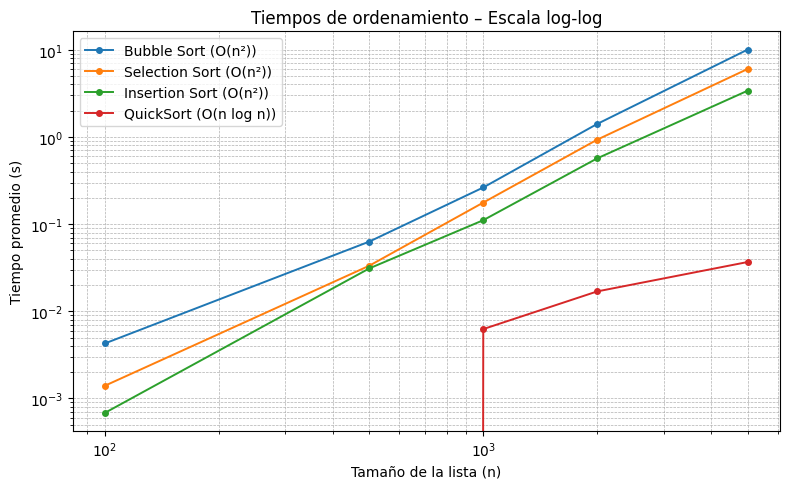

In [ ]:
graficar_ordenamientos(
    resultados_ordenamiento,
    tamanios_para_pruebas_ordenamiento,
    "Tiempos de ordenamiento – Escala log-log",
    escala_loglog=True
)

#### ¿Por qué cambiar la escala?

En un plano log-log una función de la forma *nᵏ* se convierte en una recta cuya pendiente vale *k*.

**Lectura del gráfico**

- Las curvas de *Bubble*, *Selection* e *Insertion* casi coinciden y tienen pendiente ≈ 2 →  **O(n²)**.  
- La curva de *Quick Sort* se acerca a pendiente 1 → **O(n log n)** (log n crece poco y casi no cambia la pendiente).  

> Esta representación facilita comparar pendientes en lugar de valores absolutos y refuerza la interpretación teórica de cada algoritmo.

### 5.ALGORITMOS DE BÚSQUEDA

Los algoritmos de búsqueda se encargan de encontrar un elemento específico dentro de una lista.

#### 5.1. BÚSQUEDA LINEAL

Es la forma más sencilla. Recorre cada elemento de la lista uno por uno, desde el principio hasta el final, comparando cada elemento con el que buscamos. Si lo encuentra, termina; si llega al final sin encontrarlo, significa que no está.

In [ ]:
# --- Búsqueda Lineal por Nombre ---
# Busca un producto por su 'nombre' en una lista de productos (diccionarios).
def busqueda_lineal_por_nombre(lista_productos, nombre_buscado):
    # Recorremos cada diccionario (producto) en la lista, uno por uno
    for producto in lista_productos:
        # Comparamos el 'nombre' del producto actual con el 'nombre_buscado'
        if producto['nombre'] == nombre_buscado:
            return producto # ¡Lo encontramos! Retornamos el diccionario completo del producto
    return None # Si el bucle termina y no se encontró, significa que el producto no está en la lista.

# --- Búsqueda Lineal por ID ---
# Busca un producto por su 'id' en una lista de productos (diccionarios).
def busqueda_lineal_por_id(lista_productos, id_buscado):
    # Recorremos cada diccionario (producto) en la lista
    for producto in lista_productos:
        # Comparamos el 'id' del producto actual con el 'id_buscado'
        if producto['id'] == id_buscado:
            return producto # ¡Lo encontramos! Retornamos el diccionario completo del producto
    return None # Si el bucle termina y no se encontró, significa que el producto no está en la lista.

# --- Ejemplo de uso de Búsqueda Lineal ---
print("--- Ejemplo de Búsqueda Lineal ---")
ej_productos_busq = [
    {"id": 10, "nombre": "Laptop XYZ", "precio": 1200.00},
    {"id": 20, "nombre": "Auricular Max", "precio": 150.00},
    {"id": 30, "nombre": "Smart TV 55", "precio": 700.00}
]

# Buscar un producto existente por nombre
producto_encontrado_nombre = busqueda_lineal_por_nombre(ej_productos_busq, "Auricular Max")
if producto_encontrado_nombre:
    print(f"Encontrado por nombre: {producto_encontrado_nombre}")
else:
    print("Producto por nombre no encontrado.")

# Buscar un producto no existente por ID
producto_encontrado_id = busqueda_lineal_por_id(ej_productos_busq, 25)
if producto_encontrado_id:
    print(f"Encontrado por ID: {producto_encontrado_id}")
else:
    print("Producto por ID no encontrado.")
print("-" * 50)

--- Ejemplo de Búsqueda Lineal ---
Encontrado por nombre: {'id': 20, 'nombre': 'Auricular Max', 'precio': 150.0}
Producto por ID no encontrado.
--------------------------------------------------


#### 5.2. BÚSQUEDA BINARIA

¡Esta es muy eficiente, pero tiene una condición MUY IMPORTANTE! La lista DEBE estar ordenada (en nuestro caso, la buscaremos por id, por lo que la lista debe estar ordenada por id). Imagina que estás buscando una palabra en un diccionario. No empiezas por la primera página. Abres por el medio, si la palabra que buscas está antes, vas a la mitad de la parte izquierda; si está después, a la mitad de la parte derecha. Repites esto, eliminando la mitad de las opciones en cada paso, hasta que encuentras la palabra o te das cuenta de que no está.

In [ ]:
# --- Búsqueda Binaria por ID (Requiere lista ORDENADA por ID) ---
# Busca un producto por su 'id' en una lista de productos (diccionarios) que ya está ordenada por 'id'.
def busqueda_binaria_por_id(lista_productos_ordenada_por_id, id_buscado):
    low = 0 # El índice más bajo del rango de búsqueda actual
    high = len(lista_productos_ordenada_por_id) - 1 # El índice más alto del rango de búsqueda actual

    # Mientras el rango de búsqueda sea válido (es decir, low no ha superado a high)
    while low <= high:
        mid = (low + high) // 2 # Calculamos el índice del elemento del medio
        producto_medio = lista_productos_ordenada_por_id[mid] # Obtenemos el producto en la posición media

        # Comparamos el 'id' del producto del medio con el 'id_buscado'
        if producto_medio['id'] == id_buscado:
            return producto_medio # ¡Lo encontramos! Retornamos el diccionario completo del producto
        elif producto_medio['id'] < id_buscado:
            # Si el ID del producto del medio es MENOR que el buscado, significa que el ID buscado
            # debe estar en la mitad DERECHA de la lista (si es que existe).
            low = mid + 1 # Movemos 'low' para que la búsqueda continúe en la mitad derecha
        else: # producto_medio['id'] > id_buscado
            # Si el ID del producto del medio es MAYOR que el buscado, significa que el ID buscado
            # debe estar en la mitad IZQUIERDA de la lista (si es que existe).
            high = mid - 1 # Movemos 'high' para que la búsqueda continúe en la mitad izquierda

    return None # Si el bucle termina (low superó a high) y no se encontró el producto, retorna None

# --- Ejemplo de uso de Búsqueda Binaria ---
print("--- Ejemplo de Búsqueda Binaria ---")
# La lista DEBE estar ordenada por ID para que la búsqueda binaria funcione correctamente.
# Usamos la función integrada 'sorted' de Python, que es muy eficiente.
ej_productos_busq_binaria = [
    {"id": 10, "nombre": "Laptop XYZ", "precio": 1200.00},
    {"id": 30, "nombre": "Smart TV 55", "precio": 700.00},
    {"id": 20, "nombre": "Auricular Max", "precio": 150.00},
    {"id": 40, "nombre": "Monitor Gamer", "precio": 900.00}
]
ej_productos_busq_binaria_ordenada = sorted(ej_productos_busq_binaria, key=lambda p: p['id'])

print("Lista ordenada por ID para búsqueda binaria:")
for p in ej_productos_busq_binaria_ordenada:
    print(p)

# Buscar un producto existente por ID
producto_encontrado_bin = busqueda_binaria_por_id(ej_productos_busq_binaria_ordenada, 30)
if producto_encontrado_bin:
    print(f"\nEncontrado por ID con Búsqueda Binaria: {producto_encontrado_bin}")
else:
    print("\nProducto por ID con Búsqueda Binaria no encontrado.")

# Buscar un producto no existente por ID
producto_no_encontrado_bin = busqueda_binaria_por_id(ej_productos_busq_binaria_ordenada, 50)
if producto_no_encontrado_bin:
    print(f"Encontrado por ID con Búsqueda Binaria: {producto_no_encontrado_bin}")
else:
    print("Producto por ID con Búsqueda Binaria no encontrado.")
print("-" * 50)

--- Ejemplo de Búsqueda Binaria ---
Lista ordenada por ID para búsqueda binaria:
{'id': 10, 'nombre': 'Laptop XYZ', 'precio': 1200.0}
{'id': 20, 'nombre': 'Auricular Max', 'precio': 150.0}
{'id': 30, 'nombre': 'Smart TV 55', 'precio': 700.0}
{'id': 40, 'nombre': 'Monitor Gamer', 'precio': 900.0}

Encontrado por ID con Búsqueda Binaria: {'id': 30, 'nombre': 'Smart TV 55', 'precio': 700.0}
Producto por ID con Búsqueda Binaria no encontrado.
--------------------------------------------------


### 6.MEDICIÓN Y COMPARACIÓN DE ALGORITMOS DE BÚSQUEDA

Ahora mediremos y compararemos la eficiencia de los algoritmos de búsqueda.

#### 6.1. Función para Medir Tiempos de Búsqueda y Generar Datos

In [ ]:
# --- Función para medir el tiempo de ejecución de algoritmos de búsqueda ---
# Toma una función de algoritmo, una lista, el valor a buscar y el número de repeticiones.
def medir_tiempo_busqueda(algoritmo_func, lista, valor_buscado, num_repeticiones=50):
    tiempos = []
    for _ in range(num_repeticiones):
        start_time = time.time()
        algoritmo_func(lista, valor_buscado) # Ejecuta el algoritmo de búsqueda
        end_time = time.time()
        tiempos.append(end_time - start_time)
    return sum(tiempos) / num_repeticiones # Retorna el tiempo promedio

# --- Función para generar y medir el rendimiento de búsqueda ---
# Prepara la ejecución de los algoritmos de búsqueda para diferentes tamaños de lista.
def generar_y_medir_busqueda(
        diccionario_algoritmos,
        tamanios_lista,id_a_buscar_existente_ejemplo,
        id_no_existente_ejemplo,
        nombre_a_buscar_existente_ejemplo,
        nombre_no_existente_ejemplo,
        num_repeticiones=5
        ):

    # Diccionarios para guardar los tiempos para elementos existentes y no existentes
    resultados_existente = {}
    for nombre in diccionario_algoritmos:
        resultados_existente[nombre] = []

    resultados_no_existente = {}
    for nombre in diccionario_algoritmos:
        resultados_no_existente[nombre] = []
    #resultados_existente = {nombre: [] for nombre in diccionario_algoritmos.keys()}
    #resultados_no_existente = {nombre: [] for nombre in diccionario_algoritmos.keys()}

    for tam in tamanios_lista: # Recorremos los diferentes tamaños de lista
        print(f"-> Generando y midiendo búsqueda para {tam} productos...")
        lista_productos_actual = generar_productos(tam) # Generamos la lista de productos

        # Para la búsqueda binaria, la lista DEBE estar ordenada por ID.
        # Usamos 'sorted' para crear una copia ordenada por 'id'.
        lista_productos_ordenada_por_id = sorted(lista_productos_actual, key=lambda p: p['id']) 

        # Obtenemos un ID y nombre de un producto que SI exista para las pruebas de "elemento existente".
        # Usamos el primer elemento de la lista ordenada para asegurarnos que exista.
        if tam > 0:
            id_real_existente = lista_productos_ordenada_por_id[0]['id']
            nombre_real_existente = lista_productos_actual[0]['nombre']
        else: # Caso de lista vacía
            id_real_existente = id_a_buscar_existente_ejemplo # Usamos el ejemplo si la lista es vacía
            nombre_real_existente = nombre_a_buscar_existente_ejemplo

        # Ejecutar y medir para cada algoritmo de búsqueda
        for nombre_alg, func_alg in diccionario_algoritmos.items():
            if "binaria" in nombre_alg.lower(): # Si es el algoritmo de Búsqueda Binaria
                # La búsqueda binaria SIEMPRE usa la lista ORDENADA por ID.
                tiempo_existente = medir_tiempo_busqueda(func_alg, lista_productos_ordenada_por_id, id_real_existente, num_repeticiones)
                tiempo_no_existente = medir_tiempo_busqueda(func_alg, lista_productos_ordenada_por_id, id_no_existente_ejemplo, num_repeticiones)
            elif "id" in nombre_alg.lower(): # Si es Búsqueda Lineal por ID
                # La búsqueda lineal puede usar la lista original (no necesariamente ordenada).
                tiempo_existente = medir_tiempo_busqueda(func_alg, lista_productos_actual, id_real_existente, num_repeticiones)
                tiempo_no_existente = medir_tiempo_busqueda(func_alg, lista_productos_actual, id_no_existente_ejemplo, num_repeticiones)
            elif "nombre" in nombre_alg.lower(): # Si es Búsqueda Lineal por Nombre
                # La búsqueda lineal puede usar la lista original.
                tiempo_existente = medir_tiempo_busqueda(func_alg, lista_productos_actual, nombre_real_existente, num_repeticiones)
                tiempo_no_existente = medir_tiempo_busqueda(func_alg, lista_productos_actual, nombre_no_existente_ejemplo, num_repeticiones)
            else: # En caso de que haya un algoritmo no clasificado (muy raro)
                tiempo_existente = 0
                tiempo_no_existente = 0

            resultados_existente[nombre_alg].append(tiempo_existente)
            resultados_no_existente[nombre_alg].append(tiempo_no_existente)

    return resultados_existente, resultados_no_existente

#### 6.2. Ejecución de Pruebas de Búsqueda y Graficación

-> Generando y midiendo búsqueda para 100 productos...
-> Generando y midiendo búsqueda para 1000 productos...
-> Generando y midiendo búsqueda para 5000 productos...
-> Generando y midiendo búsqueda para 10000 productos...
-> Generando y midiendo búsqueda para 50000 productos...
-> Generando y midiendo búsqueda para 100000 productos...


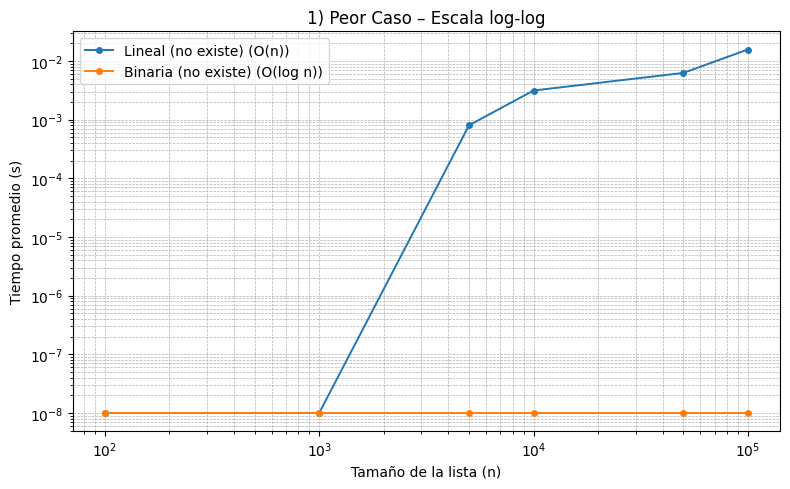

In [ ]:
# 1) Definir tamaños y algoritmos
tamanios_para_pruebas_busqueda = [100,   1_000,   5_000,  10_000,  50_000, 100_000]
algoritmos_busqueda = {
    "Búsqueda Lineal por Nombre": busqueda_lineal_por_nombre,
    "Búsqueda Lineal por ID"   : busqueda_lineal_por_id,
    "Búsqueda Binaria por ID"  : busqueda_binaria_por_id
}

# 2) Medir
resultados_busqueda_existente, resultados_busqueda_no_existente = generar_y_medir_busqueda(
    algoritmos_busqueda,
    tamanios_para_pruebas_busqueda,
    id_a_buscar_existente_ejemplo=1,
    id_no_existente_ejemplo=-1,
    nombre_a_buscar_existente_ejemplo="Producto X",
    nombre_no_existente_ejemplo="Producto Inexistente XYZ",
    num_repeticiones=5
)

# ——————————————————————————————————————————————————————————
#  1) Peor Caso – Escala log-log
# ——————————————————————————————————————————————————————————
graficar_busquedas(
    {
        "Lineal (no existe)" : resultados_busqueda_no_existente["Búsqueda Lineal por ID"],
        "Binaria (no existe)": resultados_busqueda_no_existente["Búsqueda Binaria por ID"],
    },
    tamanios_para_pruebas_busqueda,
    "1) Peor Caso – Escala log-log",
    escala_loglog=True,
    mostrar_pendientes=False
)

#### Escenario evaluado

Se mide el **tiempo de búsqueda cuando el elemento no está** en la lista  
(peor caso real para ambos algoritmos).

**Puntos clave**

| Curva | Forma | Complejidad |
|-------|-------|-------------|
| Lineal (no existe) | Recta con pendiente ≈ 1 | **O(n)** |
| Binaria (no existe) | Casi horizontal | **O(log n)** |



**Mensaje:** en el peor caso la búsqueda lineal necesita recorrer toda la lista; la binaria solo hace log₂ n comparaciones, por eso la curva es casi plana.



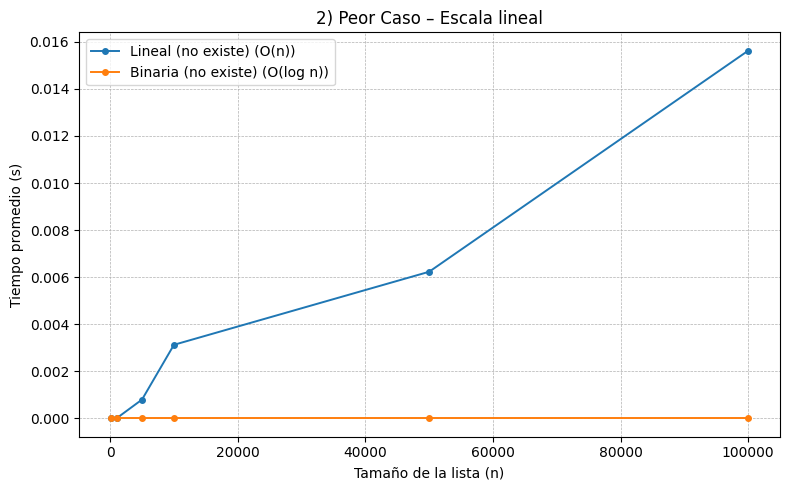

In [ ]:
# ——————————————————————————————————————————————————————————
#  2) Peor Caso – Escala lineal
# ——————————————————————————————————————————————————————————
graficar_busquedas(
    {
        "Lineal (no existe)" : resultados_busqueda_no_existente["Búsqueda Lineal por ID"],
        "Binaria (no existe)": resultados_busqueda_no_existente["Búsqueda Binaria por ID"],
    },
    tamanios_para_pruebas_busqueda,
    "2) Peor Caso – Escala lineal"
)

#### Misma medición, escala distinta

Ahora ambos ejes son aritméticos.  
El contraste entre algoritmos es aún más evidente:

- La búsqueda lineal crece rápido y pronto entra en el rango de las milésimas de segundo.  
- La binaria permanece en el orden de los microsegundos y parece casi una línea horizontal.

**Conclusión operativa:** Para grandes volúmenes, la búsqueda lineal se vuelve costosa; conviene ordenar la lista una sola vez y luego buscar con el método binario.


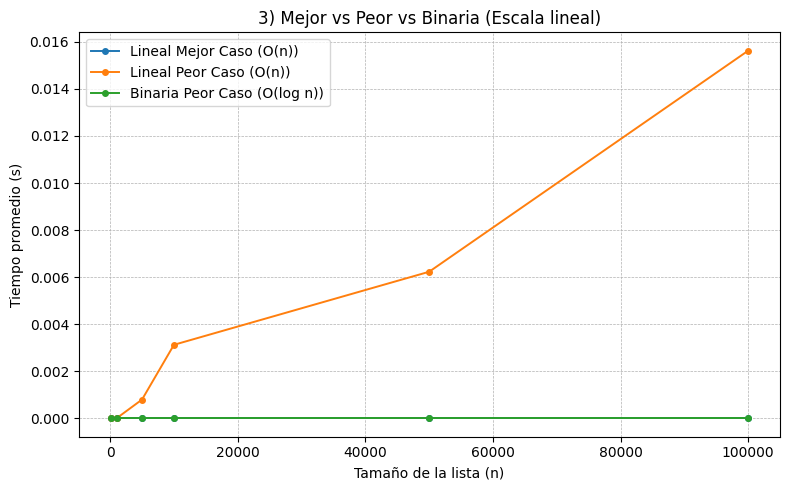

In [ ]:
# ——————————————————————————————————————————————————————————
#  3) Mejor vs Peor vs Binaria
# ——————————————————————————————————————————————————————————
graficar_busquedas(
    {
        "Lineal Mejor Caso" : resultados_busqueda_existente["Búsqueda Lineal por ID"],
        "Lineal Peor Caso"  : resultados_busqueda_no_existente["Búsqueda Lineal por ID"],
        "Binaria Peor Caso" : resultados_busqueda_no_existente["Búsqueda Binaria por ID"],
    },
    tamanios_para_pruebas_busqueda,
    "3) Mejor vs Peor vs Binaria (Escala lineal)"
)

#### Tres situaciones comparadas

1. **Lineal mejor caso:** el elemento está en la primera posición → tiempo casi constante.  
2. **Lineal peor caso:** el elemento no está → curva creciente **O(n)**.  
3. **Binaria peor caso:** log₂ n comparaciones → curva muy plana.

**Lo importante que notar**

Aunque la búsqueda lineal puede ser tan rápida como la binaria en el mejor caso,
cualquier desviación empeora su rendimiento drásticamente.
A partir de unas pocas centenas de elementos la binaria supera con holgura a la lineal promedio.

**Idea para defender:** “La lineal solo gana si tenemos suerte; la binaria ofrece un tiempo predeciblemente bajo en todos los casos.”


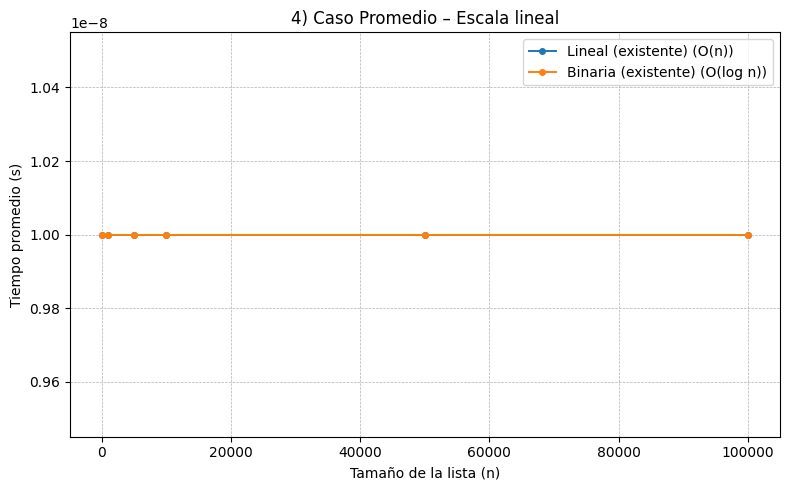

In [ ]:
# ——————————————————————————————————————————————————————————
#  4) Caso Promedio – Escala lineal  (con línea de corte)
# ——————————————————————————————————————————————————————————
graficar_busquedas(
    {
        "Lineal (existente)" : resultados_busqueda_existente["Búsqueda Lineal por ID"],
        "Binaria (existente)": resultados_busqueda_existente["Búsqueda Binaria por ID"],
    },
    tamanios_para_pruebas_busqueda,
    "4) Caso Promedio – Escala lineal",
    marcar_break_even=True                 # ← dibuja la línea vertical
)

#### Cómo se calculó

Para cada tamaño *n* se realizaron varias búsquedas de elementos que **sí existen**
en posiciones aleatorias y se promedió el tiempo resultante.

**Lo que revela el gráfico**

- Con los tamaños elegidos y el hardware usado, los tiempos individuales
  son del orden de **10⁻⁸ s**; la resolución del cronómetro hace que
  línea lineal y binaria queden superpuestas.  
- En condiciones reales (listas mayores o mediciones que acumulen más repeticiones)
  la búsqueda lineal tenderá a crecer con pendiente ≈ 1,
  mientras la binaria apenas se inclinará (O(log n)).

> **Conclusión práctica:** Aunque aquí las lineas se solapan,
con volúmenes de datos ligeramente mayores o un cronometraje más fino
la búsqueda binaria muestra su ventaja a partir de unos pocos miles de elementos.

